# Exercise 1

Exercise 1: Analyze a Noisy Signal
- Add random noise to the signal from our example using np.random.randn().
- Compute and plot the FFT. <br>
Question: Can you still see the 50 Hz and 120 Hz peaks? How does noise appear in the frequency domain?


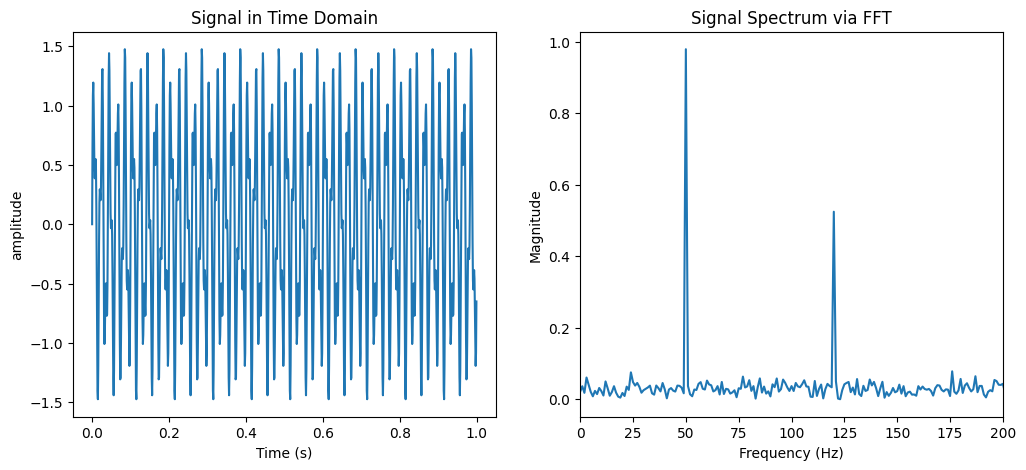

In [58]:
import numpy as np 
import matplotlib.pyplot as plt

#Signal Parameters
sampling_rate = 1000
T = 1.0
N = int(sampling_rate * T)
t = np.linspace(0.0, T, N, endpoint=False)
pi = np.pi

#Signal with two frequencies: 50 HZ and 120 HZ
freq1 = 50
freq2 = 120
signal = np.sin(freq1 * 2.0 * pi * t) + 0.5 * np.sin(freq2 * 2.0 * pi * t)

# add Random noise!
random_noise = 0.5 * np.random.randn(N)

# signal + Noise
noisy_signal = random_noise + signal

## Compute THE FFT
signal_fft = np.fft.fft(noisy_signal)

## The FFT output is complex. Take absolute value for magnitude
## we only need first half of the array (N/2) due to symmetry
fft_magnitude = 2.0/N * np.abs(signal_fft[0:N//2])

# Frequeny Axis for the plot
freq_axis = np.fft.fftfreq(N, 1/sampling_rate)[:N//2]

# VIsualization
plt.figure(figsize=(12,5))

# time domain signal
plt.subplot(1,2,1)
plt.plot(t, signal)
plt.title("Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("amplitude")

# frequency domain signal (spectrum)
plt.subplot(1,2,2)
plt.plot(freq_axis, fft_magnitude)
plt.title("Signal Spectrum via FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0,200) # Zoom in

plt.show()



#### Question: Can you still see the 50 Hz and 120 Hz peaks? How does noise appear in the frequency domain?
- You can still see the 50Hz and 120 Hz peaks, but the noise appears in the frequency domain is that it adds    small random components across other frequency

## Exercise 2
- Take the FFT of the noisy signal.
- In the frequency domain, "zero out" the noise by setting small magnitude values to zero.
- Apply the Inverse FFT (np.fft.ifft) to the filtered spectrum.
- Plot the resulting time-domain signal. It should look much cleaner!


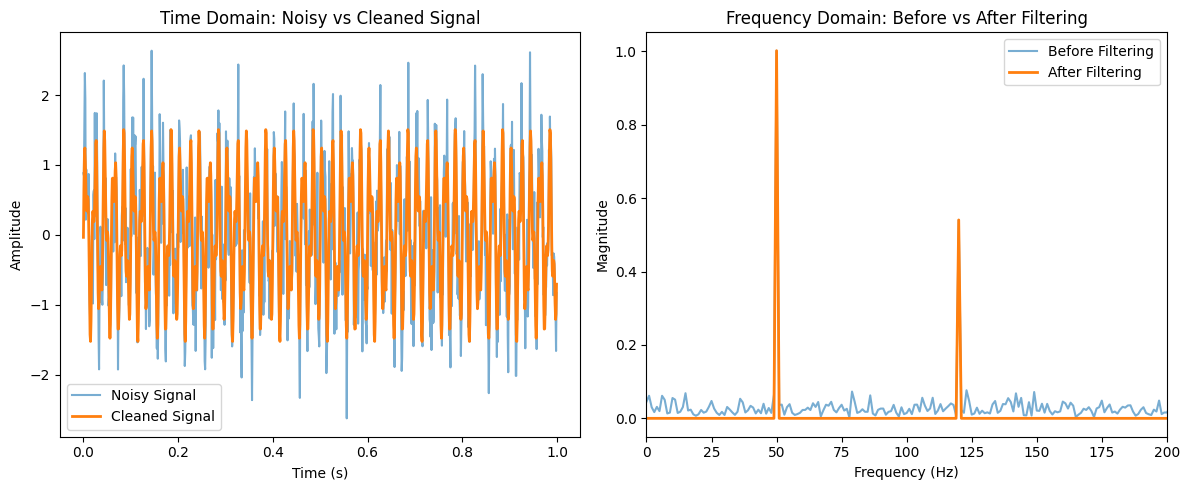

In [59]:
import numpy as np 
import matplotlib.pyplot as plt

#Signal Parameters
sampling_rate = 1000
T = 1.0
N = int(sampling_rate * T)
t = np.linspace(0.0, T, N, endpoint=False)
pi = np.pi

#Signal with two frequencies: 50 HZ and 120 HZ
freq1 = 50
freq2 = 120
signal = np.sin(freq1 * 2.0 * pi * t) + 0.5 * np.sin(freq2 * 2.0 * pi * t)

# add Random noise! (zero mean)
np.random.seed(0)  # remove if  want different noise each run
random_noise = 0.5 * np.random.randn(N)   # Gaussian(0, 0.5)

# signal + Noise
noisy_signal = random_noise + signal

# -------------------------------------------------------------
# 1) Take the FFT of the noisy signal (frequency-domain)
# -------------------------------------------------------------
signal_fft = np.fft.fft(noisy_signal)

# The FFT output is complex. Take absolute value for magnitude
# we only need first half of the array (N/2) due to symmetry
fft_magnitude = 2.0 / N * np.abs(signal_fft[0:N//2])

# Frequeny Axis for the plot
freq_axis = np.fft.fftfreq(N, 1/sampling_rate)[:N//2]

# -------------------------------------------------------------------
# 2) Zero out noise: threshold small magnitudes in the spectrum to 0
#    (simple hard-threshold denoising; adjust "alpha" as desired)
# -------------------------------------------------------------------
mag = np.abs(signal_fft)
alpha = 0.2  # threshold factor (0.1 - 0.3 usually works well)
thr = alpha * mag.max()

# copy FFT data and remove weak frequencies
signal_fft_filtered = signal_fft.copy()
signal_fft_filtered[mag < thr] = 0

# -------------------------------------------------------------
# 3) Apply Inverse FFT (np.fft.ifft) to get back clean signal
# -------------------------------------------------------------
cleaned_signal = np.fft.ifft(signal_fft_filtered).real  # take only real part

# -------------------------------------------------------------
# 4) Plot the resulting time-domain signal (should look cleaner!)
# -------------------------------------------------------------
plt.figure(figsize=(12,5))

# time domain signal (noisy vs cleaned)
plt.subplot(1,2,1)
plt.plot(t, noisy_signal, alpha=0.6, label="Noisy Signal")
plt.plot(t, cleaned_signal, linewidth=2, label="Cleaned Signal")
plt.title("Time Domain: Noisy vs Cleaned Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# frequency domain signal (before vs after filtering)
plt.subplot(1,2,2)
plt.plot(freq_axis, fft_magnitude, alpha=0.6, label="Before Filtering")
plt.plot(freq_axis, 2.0 / N * np.abs(signal_fft_filtered[0:N//2]), linewidth=2, label="After Filtering")
plt.title("Frequency Domain: Before vs After Filtering")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 200)
plt.legend()

plt.tight_layout()
plt.show()
